In [1]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [3]:
img=cv.imread("screen2/one.jpeg")

In [5]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
#plt.imshow(img)

In [7]:
#pip install mtcnn

In [7]:
from mtcnn.mtcnn import MTCNN

detector=MTCNN()
results=detector.detect_faces(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


In [11]:
results

[{'box': [526, 1082, 74, 92],
  'confidence': 0.9999995231628418,
  'keypoints': {'left_eye': (540, 1117),
   'right_eye': (575, 1115),
   'nose': (551, 1137),
   'mouth_left': (543, 1154),
   'mouth_right': (573, 1154)}},
 {'box': [2070, 964, 45, 57],
  'confidence': 0.9999992847442627,
  'keypoints': {'left_eye': (2080, 987),
   'right_eye': (2100, 988),
   'nose': (2086, 998),
   'mouth_left': (2079, 1007),
   'mouth_right': (2097, 1009)}},
 {'box': [1742, 877, 46, 56],
  'confidence': 0.9999974966049194,
  'keypoints': {'left_eye': (1753, 900),
   'right_eye': (1774, 894),
   'nose': (1765, 909),
   'mouth_left': (1759, 923),
   'mouth_right': (1776, 919)}},
 {'box': [2766, 1011, 59, 68],
  'confidence': 0.9999951124191284,
  'keypoints': {'left_eye': (2785, 1034),
   'right_eye': (2813, 1038),
   'nose': (2797, 1049),
   'mouth_left': (2784, 1062),
   'mouth_right': (2807, 1066)}},
 {'box': [765, 1081, 79, 92],
  'confidence': 0.9999915361404419,
  'keypoints': {'left_eye': (790, 

In [9]:
for result in results:
    x, y, w, h = result['box']
    # Draw a bounding box around the face
    img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
#plt.imshow(img)

In [17]:
#pip install keras-facenet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10387 sha256=be369bc0b2f706a9b01f9b7198ffe067d62933e59730143bd3395e1cc2890c49
  Stored in directory: c:\users\rumana\appdata\local\pip\cache\wheels\05\b0\f5\19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet
Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

class FaceLoader:
    def __init__(self, directory):
        self.directory = directory
        self.X = []
        self.Y = []

    def load_faces(self):
        for sub_dir in os.listdir(self.directory):
            sub_dir_path = os.path.join(self.directory, sub_dir)
            if not os.path.isdir(sub_dir_path):
                continue
            for filename in os.listdir(sub_dir_path):
                if filename.endswith('.jpeg') or filename.endswith('.jpg'):
                    image_path = os.path.join(sub_dir_path, filename)
                    image = cv2.imread(image_path)
                    if image is None:
                        continue  # Skip if the image is not read correctly
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    self.X.append(image)
                    self.Y.append(sub_dir)
                    print(f"Loaded successfully: {filename} from {sub_dir}")

# Load train faces
train_loader = FaceLoader("train")
train_loader.load_faces()

# Load test faces
test_loader = FaceLoader("test")
test_loader.load_faces()

Loaded successfully: face_11_aug_0_1162.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_1513.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_1868.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_2761.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_4781.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_6735.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_7225.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_783.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_7867.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_9801.jpg from Aatif ahmed
Loaded successfully: face_5.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_3003.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_3478.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_6824.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_9265.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_9676.jpg from Aatif ahmed
Loaded successfully: face_14_aug_0_1841.jp

In [21]:
# Combine loaded data
X_train_images = train_loader.X
Y_train = train_loader.Y
X_test_images = test_loader.X
Y_test = test_loader.Y

In [23]:
# Initialize the FaceNet embedder
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype("float32")
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

# Embed the training images
EMBEDDED_X_train = [get_embedding(img) for img in X_train_images]
EMBEDDED_X_train = np.asarray(EMBEDDED_X_train)

# Embed the testing images
EMBEDDED_X_test = [get_embedding(img) for img in X_test_images]
EMBEDDED_X_test = np.asarray(EMBEDDED_X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [25]:
encoder = LabelEncoder()
encoder.fit(Y_train + Y_test)  # Fit on both train and test labels to ensure consistency
Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

In [27]:
print(f"Length of X_train: {len(X_train_images)}")
print(f"Length of X_test: {len(X_test_images)}")
print(f"Length of Y_train: {len(Y_train)}")
print(f"Length of Y_test: {len(Y_test)}")

Length of X_train: 367
Length of X_test: 24
Length of Y_train: 367
Length of Y_test: 24


In [29]:
from sklearn.svm import SVC
model = SVC(kernel="linear", probability=True)
model.fit(EMBEDDED_X_train, Y_train)

SVC(kernel='linear', probability=True)

In [31]:
from sklearn.metrics import accuracy_score
# Predict on the test set
Y_pred = model.predict(EMBEDDED_X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 83.33333333333334


# CNN

In [ ]:
##CNN

In [11]:
import os
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Directory paths
train_dir = "train"
test_dir = "test"

class FaceLoader:
    def __init__(self, directory):
        self.directory = directory
        self.X = []
        self.Y = []

    def load_faces(self):
        for sub_dir in os.listdir(self.directory):
            sub_dir_path = os.path.join(self.directory, sub_dir)
            if not os.path.isdir(sub_dir_path):
                continue
            for filename in os.listdir(sub_dir_path):
                if filename.endswith('.jpeg') or filename.endswith('.jpg'):
                    image_path = os.path.join(sub_dir_path, filename)
                    image = cv2.imread(image_path)
                    if image is None:
                        continue  # Skip if the image is not read correctly
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    self.X.append(image)
                    self.Y.append(sub_dir)
                    print(f"Loaded successfully: {filename} from {sub_dir}")


In [13]:
train_loader = FaceLoader(train_dir)
train_loader.load_faces()

# Load test faces
test_loader = FaceLoader(test_dir)
test_loader.load_faces()

# Combine loaded data
X_train_images = train_loader.X
Y_train = train_loader.Y
X_test_images = test_loader.X
Y_test = test_loader.Y

Loaded successfully: face_11_aug_0_1162.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_1513.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_1868.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_2761.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_4781.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_6735.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_7225.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_783.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_7867.jpg from Aatif ahmed
Loaded successfully: face_11_aug_0_9801.jpg from Aatif ahmed
Loaded successfully: face_5.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_3003.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_3478.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_6824.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_9265.jpg from Aatif ahmed
Loaded successfully: face_5_aug_0_9676.jpg from Aatif ahmed
Loaded successfully: face_14_aug_0_1841.jp

In [15]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype("float32")
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

# Embed the training images
EMBEDDED_X_train = [get_embedding(img) for img in X_train_images]
EMBEDDED_X_train = np.asarray(EMBEDDED_X_train)

# Embed the testing images
EMBEDDED_X_test = [get_embedding(img) for img in X_test_images]
EMBEDDED_X_test = np.asarray(EMBEDDED_X_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
encoder = LabelEncoder()
encoder.fit(Y_train + Y_test)
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

# One-hot encode labels
Y_train_categorical = to_categorical(Y_train_encoded)
Y_test_categorical = to_categorical(Y_test_encoded)

In [19]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

model = Sequential([
    Dense(256, input_shape=(EMBEDDED_X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(len(encoder.classes_), activation='softmax')
])

C:\Users\Rumana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Rumana\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(EMBEDDED_X_train, Y_train_categorical, epochs=70, batch_size=32, validation_data=(EMBEDDED_X_test, Y_test_categorical))


Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.0844 - loss: 3.4558 - val_accuracy: 0.0417 - val_loss: 3.1399
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4837 - loss: 1.9014 - val_accuracy: 0.0833 - val_loss: 3.0959
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7168 - loss: 1.2476 - val_accuracy: 0.0833 - val_loss: 3.0630
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8777 - loss: 0.9212 - val_accuracy: 0.1250 - val_loss: 3.0325
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8929 - loss: 0.7397 - val_accuracy: 0.1250 - val_loss: 3.0081
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9277 - loss: 0.5941 - val_accuracy: 0.1250 - val_loss: 2.9843
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9449 - loss: 0.5127 - val_accuracy: 0.1250 - val_loss: 2.9576
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9471 - loss: 0.4416 - val_accuracy: 0.1250 -

In [23]:
loss, accuracy = model.evaluate(EMBEDDED_X_test, Y_test_categorical)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8750 - loss: 0.7622
Test Accuracy: 87.50%


In [29]:
detector = MTCNN()

t_im_path = "screen2/four.jpeg"
t_im = cv2.imread(t_im_path)
t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)


faces = detector.detect_faces(t_im)

for face in faces:
    x, y, w, h = face['box']
    face_region = t_im[y:y+h, x:x+w]
    face_region = cv2.resize(face_region, (160, 160))
    embedding = get_embedding(face_region)
    embedding = np.expand_dims(embedding, axis=0)
    prediction = model.predict(embedding)
    label = encoder.inverse_transform([np.argmax(prediction)])[0]
    cv2.rectangle(t_im, (x, y), (x+w, y+h), (0, 255, 0), 4)
    

    cv2.putText(t_im, label, (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4, cv2.LINE_AA)


#plt.figure(figsize=(20, 20))


#plt.imshow(t_im)
#plt.axis('off')

output_path = "results/pic.jpg"


plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
#plt.show()

print(f"Image saved successfully at {output_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━

<Figure size 640x480 with 0 Axes>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Rumana\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Rumana\AppData\Local\Temp\ipykernel_14920\192937737.py", line 37, in upload_image
    img = img.resize((400, 300), Image.ANTIALIAS)
                                 ^^^^^^^^^^^^^^^
AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━

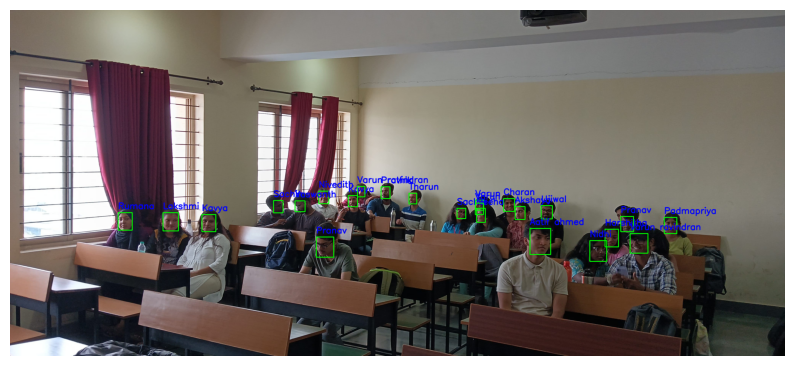

In [31]:
#import tkinter as tk
#from tkinter import filedialog, messagebox
#from PIL import Image, ImageTk
#import pandas as pd
#import cv2
#from mtcnn import MTCNN
#import numpy as np
#from keras_facenet import FaceNet

#embedder=FaceNet()
#detector=MTCNN()

#def get_embedding(face_img):
#    face_img = face_img.astype("float32")
#    face_img = np.expand_dims(face_img, axis=0)
#    yhat = embedder.embeddings(face_img)
#    return yhat[0]

#def display_info():
#    info_text = (
#        "• Number of images dedicated to training: 367\n"
#        "• Number of images used for testing: 24\n"
#        "• SVM accuracy: 83.33%\n"
#       "• CNN accuracy: 87.50%"
#    )
#    result_text.delete('1.0', tk.END)
#    result_text.insert(tk.END, info_text)


#def upload_image():
#    global selected_image_path
#    selected_image_path = filedialog.askopenfilename(
#        filetypes=[("Image files", "*.jpeg;*.jpg;*.png")])
#    if selected_image_path:
#        img = Image.open(selected_image_path)
#        img = img.resize((400, 300), Image.ANTIALIAS)
#        img = ImageTk.PhotoImage(img)
#        panel.config(image=img)
#        panel.image = img
#        result_text.delete('1.0', tk.END)
#        result_text.insert(tk.END, "Uploaded classroom image successfully")


#def process_data():
#    global selected_image_path,predicted_names
#    if not selected_image_path:
#        messagebox.showerror("Error", "No image selected!")
#        return

#    t_im = cv2.imread(selected_image_path)
#    t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)
#    faces = detector.detect_faces(t_im)

#    predicted_names = []

#    for face in faces:
#        x, y, w, h = face['box']
#        face_region = t_im[y:y+h, x:x+w]
#        face_region = cv2.resize(face_region, (160, 160))
#        embedding = get_embedding(face_region)
#        embedding = np.expand_dims(embedding, axis=0)
#        prediction = model.predict(embedding)
#        label = encoder.inverse_transform([np.argmax(prediction)])[0]
#        predicted_names.append(label)
#        cv2.rectangle(t_im, (x, y), (x+w, y+h), (0, 255, 0), 4)
#        cv2.putText(t_im, label, (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4, cv2.LINE_AA)

#    result_text.delete('1.0', tk.END)
#    result_text.insert(tk.END, "\n".join(predicted_names))

#    plt.figure(figsize=(10, 10))
#    plt.imshow(t_im)
#    plt.axis('off')
#    plt.show()


#def open_excel_file():
#    global predicted_names
#    if not predicted_names:
#        messagebox.showerror("Error", "No data to save!")
#        return

#    df = pd.DataFrame(predicted_names, columns=["Predicted Names"])
#    excel_path = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
#    if excel_path:
#        df.to_excel(excel_path, index=False)
#        result_text.delete('1.0', tk.END)
#        result_text.insert(tk.END, f"Attendance of students present is updated in Excel at {excel_path}")


#root = tk.Tk()
#root.title("Attendance Surveillance System")

#title_label = tk.Label(root, text="ATTENDANCE SURVEILLANCE SYSTEM", font=("Helvetica", 16, "bold"))
#title_label.pack(pady=10)


#info_button = tk.Button(root, text="INFO", command=display_info, bg="lightblue")
#info_button.place(x=210, y=60)

#upload_button = tk.Button(root, text="UPLOAD CLASSROOM IMAGE", command=upload_image, bg="pink")
#upload_button.place(x=50, y=120)

#process_button = tk.Button(root, text="PROCESS DATA", command=process_data, bg="pink")
#process_button.place(x=330, y=120)

#excel_button = tk.Button(root, text="OPEN EXCEL FILE", command=open_excel_file, bg="lightblue")
#excel_button.place(x=210, y=180)

#panel = tk.Label(root)
#panel.pack(pady=20)

#result_text = tk.Text(root, height=10, width=50)
#result_text.pack(pady=10)

selected_image_path = None
predicted_names = []

root.geometry("500x600")
root.mainloop()
